# Gráficas extra

## Gráfica para el problema 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
proton_number = np.linspace(31, 36, 6)
binding_energy = np.array([651.811, 659.686, 659.485, 661.775, 655.989, 652.694])
element = np.array(['Ga', 'Ge', 'As', 'Se', 'Br', 'Kr'])

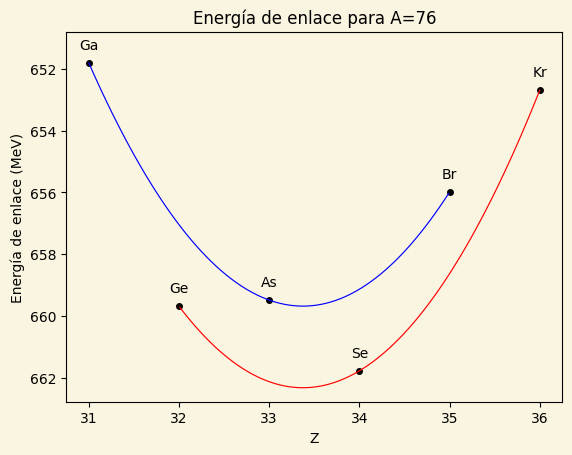

In [3]:
df = pd.DataFrame({'Z': proton_number, 'E': binding_energy, 'Element': element})
even_protons = df[df["Z"] % 2 == 0]
odd_protons = df[df["Z"] % 2 != 0]

fig, ax = plt.subplots()

# Scatter plots for even and odd 'Z' values
ax.plot(even_protons["Z"], even_protons["E"], "ok", ms=4)
ax.plot(odd_protons["Z"], odd_protons["E"], "ok", ms=4)

# Interpolation for smooth lines within the range of the data
x = np.linspace(df["Z"].min(), df["Z"].max(), 100)
x_even = even_protons["Z"]
x_odd = odd_protons["Z"]
f_even = interp1d(x_even, even_protons["E"], kind="quadratic", bounds_error=False)
f_odd = interp1d(x_odd, odd_protons["E"], kind="quadratic", bounds_error=False)

ax.plot(x, f_even(x), '-r', lw=0.85)
ax.plot(x, f_odd(x), '-b', lw=0.85)

ax.set_title("Energía de enlace para A=76")
ax.set_xlabel("Z")
ax.set_ylabel("Energía de enlace (MeV)")
ax.set_ylim(ymin=(np.max(df["E"]) + 1), ymax=(np.min(df["E"]) - 1))

for _, row in df.iterrows():
    ax.annotate(row['Element'], (row['Z'], row['E']), textcoords="offset points", xytext=(0, 10), ha='center')

fig.patch.set_facecolor((0.98, 0.96, 0.88))
ax.set_facecolor((0.98, 0.96, 0.88))

fig.savefig("./img/binding_energy.pdf", dpi=500)

## Gráficas para el problema 5

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
hbar = 6.5821119e-19 # keV*s
nuclear_momentum = np.linspace(2, 20, 10)

def moment_of_inertia(energy, total_nuclear_momentum):
    return ((hbar ** 2) / (2 * energy)) * total_nuclear_momentum * (total_nuclear_momentum + 1)  

nuclear_momentum

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

### Gráfica para las energías experimentales

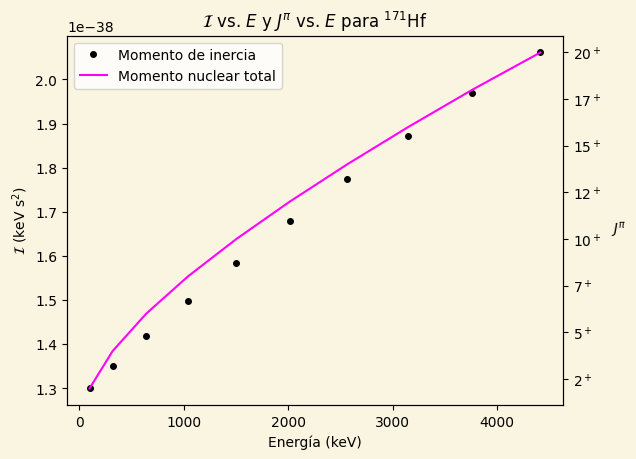

In [6]:
def format_exponents(value, pos):
    """
    Custom formatter to display ticks as exponents (e.g., 2^+)
    """
    if value == 0:
        return "0"
    else:
        return r"${}^+$".format(int(value))

experimental_E = np.array([100, 320.6, 641.1, 1041.3, 1503.3, 2013.3, 2563.6, 3147.3, 3761.6, 4413.6])
experimental_I = moment_of_inertia(experimental_E, nuclear_momentum)
df_experimental = pd.DataFrame({'I': experimental_I, 'E': experimental_E})

fig, ax1 = plt.subplots()
ax1.plot(df_experimental["E"], df_experimental["I"], "ok", ms=4, label="Momento de inercia")
ax1.set_xlabel("Energía (keV)")
ax1.set_ylabel(r"$\mathcal{I}$ (keV s$^{2}$)")

ax2 = ax1.twinx()
ax2.plot(df_experimental["E"], nuclear_momentum, color="magenta", label="Momento nuclear total")
ax2.set_ylabel(r"$J^{\pi}$", rotation=1, labelpad=12)

# Set the custom formatter for the secondary y-axis ticks
ax2.yaxis.set_major_formatter(FuncFormatter(format_exponents))

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title(r"$\mathcal{I}$ vs. $E$ y $J^{\pi}$ vs. $E$ para $^{171}$Hf")

fig.patch.set_facecolor((0.98, 0.96, 0.88))
ax1.set_facecolor((0.98, 0.96, 0.88))

fig.savefig("./img/moment_of_inertia.pdf", dpi=600)

In [7]:
df_experimental

,I,E
0,1.299726e-38,100.0
1,1.351347e-38,320.6
2,1.419136e-38,641.1
3,1.497811e-38,1041.3
4,1.585067e-38,1503.3
5,1.678482e-38,2013.3
6,1.774474e-38,2563.6
7,1.872110e-38,3147.3
8,1.969491e-38,3761.6
9,2.061374e-38,4413.6
